In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [57]:
delTime = pd.read_csv("delivery_time.csv")

In [80]:
delTime.columns = [c.replace(' ', "_") for c in delTime.columns]
delTime["dt_sq"] = delTime["Delivery_Time"] * delTime["Delivery_Time"]
delTime

,Delivery_Time,Sorting_Time,dt_sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


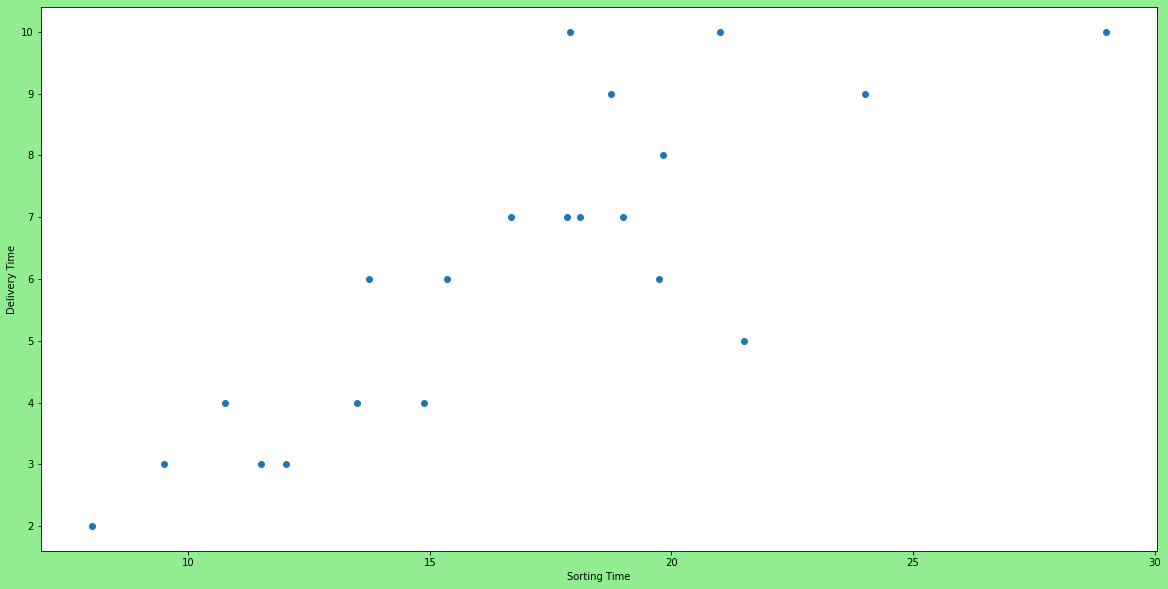

In [59]:
plt.figure(figsize=(20,10), facecolor="lightgreen")
plt.scatter(delTime.Delivery_Time, delTime.Sorting_Time)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [60]:
delTime.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [61]:
delTime.shape

(21, 2)

In [62]:
delTime["Sorting_Time"].values.reshape(-1,1)

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [63]:
lm = LinearRegression()
X = delTime["Sorting_Time"].values.reshape(-1,1)
Y = delTime["Delivery_Time"].values.reshape(-1,1)
lm.fit(X,Y)

LinearRegression()

In [64]:
delTime["Sorting_Time"]

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting_Time, dtype: int64

In [65]:
lm.predict(X)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

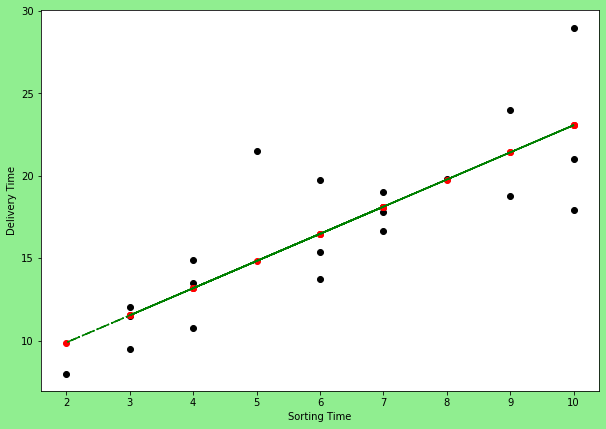

In [66]:
plt.figure(figsize=(10,7), facecolor="lightgreen")
plt.scatter(delTime.Sorting_Time, delTime.Delivery_Time, color="black", label="actual")
plt.plot(delTime.Sorting_Time, lm.predict(X), label="predicted", color="green", linestyle="-.")
plt.scatter(delTime.Sorting_Time, lm.predict(X), color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
#plt.xlim(10, 10)
#plt.ylim(0, +10)
plt.show()

In [69]:
first_model = smf.ols("Sorting_Time~Delivery_Time", data=delTime).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        17:26:22   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

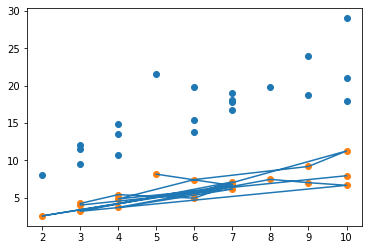

In [75]:
plt.scatter(X,Y)
plt.plot(X, first_model.predict())
plt.scatter(X, first_model.predict())
plt.show()

In [74]:
second_model = smf.ols("Sorting_Time~np.log(Delivery_Time)", data=delTime).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        17:29:17   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

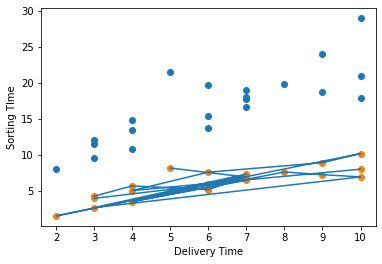

In [87]:
plt.scatter(X,Y)
plt.plot(X, second_model.predict())
plt.scatter(X, second_model.predict())
plt.xlabel("Delivery Time")
plt.ylabel("Sorting TIme")
plt.show()

In [78]:
third_model = smf.ols("np.log(Sorting_Time)~Delivery_Time", data=delTime).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Fri, 06 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                          17:30:49   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

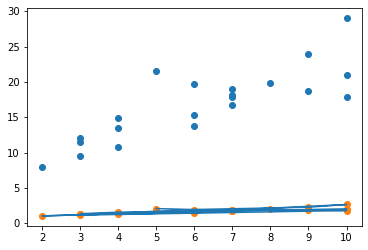

In [79]:
plt.scatter(X,Y)
plt.plot(X, third_model.predict())
plt.scatter(X, third_model.predict())
plt.xlabel("Delivery Time")
plt.ylabel("Sorting TIme")
plt.show()

In [83]:
forth_model = smf.ols("np.log(Sorting_Time)~Delivery_Time + dt_sq", data=delTime).fit()
forth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Fri, 06 Jan 2023   Prob (F-statistic):           6.77e-07
Time:                          17:36:17   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time     0.2272      0.052      4.346      0.000       0.117       0.337
dt_sq            -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

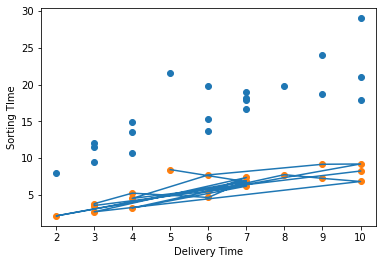

In [86]:
plt.scatter(X, Y, label="Actual")
plt.plot(X, np.exp(forth_model.predict()), label="Predicted")
plt.scatter(X, np.exp(forth_model.predict()))
plt.xlabel("Delivery Time")
plt.ylabel("Sorting TIme")

plt.show()